In [16]:
import numpy as np
import random
import pylab as plt
import seaborn as sns

from sparse_matrix_compression import relative_index_coding, relative_index_decoding, \
    gen_random_sparse_array, bits_for_storage

RANDOM_SEED = 24
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [9]:
trials = 1000
test_size = 100
test_rate = 0.5
test_maximal_int = 7

for idx in range(trials):
    test_array = gen_random_sparse_array(size=test_size, rate=test_rate)
    v, d, s = relative_index_coding(test_array, maximal_int=test_maximal_int)
    decoded_array = relative_index_decoding(v, d, s, target_len=test_size, maximal_int=test_maximal_int)
    assert np.array_equal(test_array, decoded_array)

In [44]:
bits_per_element = 6
maximal_diff_int = 2 ** bits_per_element - 1
test_size = 1000
test_rate = 0.9

compression_rates = []

for idx in range(trials):
    bits_needed = bits_for_storage(
        gen_random_sparse_array(test_size, rate=test_rate),
        maximal_diff_int,
        bits_per_element,
        inverse_coding=False,
    )
    compression_rates.append(bits_needed / test_size) # relative to bitmask

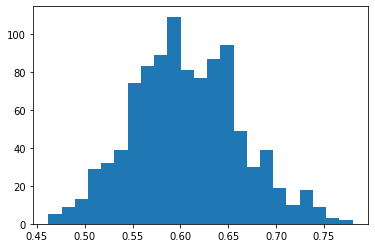

In [45]:
plt.hist(compression_rates, bins='auto');

In [36]:
bits_per_element = 2
maximal_diff_int = 2 ** bits_per_element - 1
test_size = 1000
test_rate = 0.9
test_interval = 4

compression_rates = []

for idx in range(trials):
    array = gen_random_sparse_array(test_size, rate=test_rate)
    bits_needed = 0
    for interval_index in range(int(array.shape[0] / test_interval)):
        bits_needed += bits_for_storage(
            array[interval_index * test_interval : (interval_index + 1) * test_interval],
            maximal_diff_int,
            bits_per_element,
        )
    compression_rates.append(bits_needed / test_size) # relative to bitmask

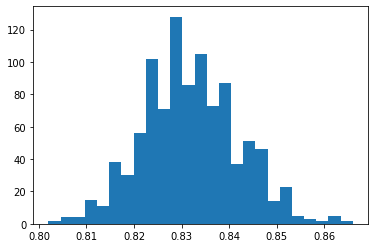

In [37]:
plt.hist(compression_rates, bins='auto');

In [55]:
bits_per_element = 2
maximal_diff_int = 2 ** bits_per_element - 1

array = gen_random_sparse_array(1000, rate=0.5)
num_bits = 0
interval = 8
for interval_index in range(int(array.shape[0] / interval)):
    sub_interval = array[
        interval_index * interval : (interval_index + 1) * interval
    ]
    if np.mean(sub_interval) <= 0.5:
        # if interval_index % 2 == 0:
        b = bits_for_storage(sub_interval, maximal_diff_int, bits_per_element)
    else:
        b = bits_for_storage(
            sub_interval, maximal_diff_int, bits_per_element, inverse_coding=True
        )
        # b += 1
    num_bits += b

print(num_bits)

1024


In [56]:
bits_per_element = 1
maximal_diff_int = 2 ** bits_per_element - 1
array = gen_random_sparse_array(1000, rate=0.5)
val, diff, sign = relative_index_coding(array, maximal_int=maximal_diff_int)
bits_per_element * diff.shape[0] + sign.shape[0]

print(np.mean(diff))
print(diff.shape)
print(sign.shape)

0.5082956259426847
(663,)
(337,)


In [57]:
bits_per_element = 1
maximal_diff_int = 2 ** bits_per_element - 1
array = gen_random_sparse_array(1000, rate=0.5)

interval = 4
full_diff = []
full_sign = []

for interval_index in range(int(array.shape[0] / interval)):
    sub_interval = array[
        interval_index * interval : (interval_index + 1) * interval
    ]
    diff, val, sign = relative_index_coding(
        sub_interval, maximal_int=maximal_diff_int
    )
    full_diff += list(diff)
    full_sign += list(sign)

full_diff = np.array(full_diff)
full_sign = np.array(full_sign)

print(len(full_diff) + len(full_sign))
print(full_diff.shape[0])
full_diff = np.array([0 if val > 0 else 1 for val in full_diff])
print(1 - np.mean(full_diff))

783
515
1.0


In [58]:
interval = 4
full_diff2 = []
full_sign2 = []
for interval_index in range(int(full_diff.shape[0] / interval)):
    sub_interval = full_diff[
        interval_index * interval : (interval_index + 1) * interval
    ]
    diff2, val, sign2 = relative_index_coding(
        sub_interval, maximal_int=maximal_diff_int
    )
    full_diff2 += list(diff2)
    full_sign2 += list(sign2)

full_diff2 = np.array(full_diff2)
full_sign2 = np.array(full_sign2)

print(len(full_diff2) + len(full_sign2))
print(full_sign.shape[0])
print(1 - np.mean(full_sign))


256
268
0.5111940298507462


In [59]:
interval = 4
full_diff3 = []
full_sign3 = []
for interval_index in range(int(full_sign.shape[0] / interval)):
    sub_interval = full_sign[
        interval_index * interval : (interval_index + 1) * interval
    ]
    diff3, val, sign3 = relative_index_coding(
        sub_interval, maximal_int=maximal_diff_int
    )
    full_diff3 += list(diff3)
    full_sign3 += list(sign3)

full_diff3 = np.array(full_diff3)
full_sign3 = np.array(full_sign3)

print(len(full_diff3) + len(full_sign3))

210
